# Error Backpropagation

# I. 실습용 데이터 생성

In [0]:
import numpy as np
np.set_printoptions(suppress = True, precision = 3)

> ## 1) Input : X (4 * 3)

In [53]:
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

> ## 2) Output : y (4 * 1)

In [54]:
y = np.array([0., 1., 1., 0.]).reshape(4, 1)

y

array([[0.],
       [1.],
       [1.],
       [0.]])

> ## 3) W1 (3 * 4)

In [55]:
np.random.seed(2045)
W1 = np.random.rand(3, 4)

W1

array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]])

> ## 4) W2 (4 * 1)

In [56]:
np.random.seed(2046)
W2 = np.random.rand(4)

W2 = W2.reshape(4, 1)
W2

array([[0.895],
       [0.596],
       [0.436],
       [0.153]])

> ## 5) y_hat (4 * 1)

In [57]:
y_hat = np.zeros([4, 1])

y_hat

array([[0.],
       [0.],
       [0.],
       [0.]])

> ## 6) Layer1 (4 * 4)

In [58]:
Layer1 = np.ones([4, 4])

Layer1

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

> ## 7) TR_Net

* np.array([X, y, W1, W2, y_hat, Layer1])

In [59]:
TR_Net = np.array([X, y, W1, W2, y_hat, Layer1])

TR_Net

array([array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]]),
       array([[0.],
       [1.],
       [1.],
       [0.]]),
       array([[0.844, 0.886, 0.139, 0.061],
       [0.192, 0.532, 0.155, 0.827],
       [0.92 , 0.015, 0.49 , 0.692]]),
       array([[0.895],
       [0.596],
       [0.436],
       [0.153]]),
       array([[0.],
       [0.],
       [0.],
       [0.]]),
       array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])], dtype=object)

# II. 함수 정의

> ## 1) sigmoid( )

* Activation Function

In [0]:
def sigmoid(x):
    y = 1 / (1 + np.exp(-x))
    
    return y

> ## 2) d_sigmoid( )

* sigmoid( ) 미분함수

In [0]:
def d_sigmoid(x):
    dy = x * (1.0 - x)
    
    return dy

> ## 3)Loss function

* Mean Squared Error

In [0]:
def loss_function(x):
  Loss = np.mean((x[1] - x[4]) ** 2)
  
  return Loss

# III. 순방향과 역방향 함수 정의

> ## 1) Forward_Propagation

* Layer1 Output
 * Layer1 = sigmoid(np.dot(X, W1))
* y_hat Output
 * y_hat = sigmoid(np.dot(Layer1, W2))
* TR_Net = np.array([X, y, W1, W2, y_hat, Layer1])
 * TR_Net[0] - X (4*3)
 * TR_Net[1] - y (4*1)
 * TR_Net[2] - W1 (3*4)
 * TR_Net[3] - W2 (4*1)
 * TR_Net[4] - y_hat (4*1)
 * TR_Net[5] - Layer1 (4*4)

In [0]:
def forwardProp(TR_Net):
    TR_Net[5] = sigmoid(np.dot(TR_Net[0], TR_Net[2]))
    TR_Net[4] = sigmoid(np.dot(TR_Net[5], TR_Net[3]))

    return TR_Net

> ## 2) Back_Propagation

* d_W2
 * d_W2 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), Layer1)
* d_W1
 * d_W1 = np.dot((-2 * (y - y_hat) * d_sigmoid(y_hat)), np.transpose(W2))
 * d_W1 = d_W1 * d_sigmoid(Layer1)
 * d_W1 = np.dot(np.transpose(X), d_W1)
* Gradient Descent
 * W1 = W1 - (0.001 * d_W1)
 * W2 = W2 - (0.001 * d_W2)
* TR_Net = np.array([X, y, W1, W2, y_hat, Layer1])
 * TR_Net[0] - X (4*3)
 * TR_Net[1] - y (4*1)
 * TR_Net[2] - W1 (3*4)
 * TR_Net[3] - W2 (4*1)
 * TR_Net[4] - y_hat (4*1)
 * TR_Net[5] - Layer1 (4*4)

In [0]:
def backProp(TR_Net):
    d_W2 = np.dot(np.transpose(TR_Net[5]), (-2 * (TR_Net[1] - TR_Net[4]) * d_sigmoid(TR_Net[4])))

    d_W1 = np.dot((-2 * (TR_Net[1] - TR_Net[4]) * d_sigmoid(TR_Net[4])), np.transpose(TR_Net[3]))
    d_W1 = d_W1 * d_sigmoid(TR_Net[5])
    d_W1 = np.dot(np.transpose(TR_Net[0]), d_W1)

    TR_Net[2] = TR_Net[2] - d_W1
    TR_Net[3] = TR_Net[3] - d_W2

    return TR_Net

# IV. 오차역전파를 적용한 Gradient Descent

* 학습 과정의 Loss 값 저장 객체

In [0]:
Loss_Record = []

> ## 1) Learning with Error Backpropagation

In [0]:
for k in range(0, 1000):
    TR_Net = forwardProp(TR_Net)
    TR_Net = backProp(TR_Net)
    
    Loss_Record.append(loss_function(TR_Net))

> ## 2) Parameter Update Check

* W1

In [67]:
TR_Net[2]

array([[ 2.165,  4.556,  6.252, -4.313],
       [ 2.453,  4.884, -2.953,  6.58 ],
       [ 1.547, -0.552,  0.307,  1.498]])

* W2

In [68]:
TR_Net[3]

array([[ 3.89 ],
       [ 7.401],
       [-7.353],
       [-7.362]])

* y_hat

In [69]:
# TR_Net[4].round()

TR_Net[4]

array([[0.013],
       [0.964],
       [0.965],
       [0.044]])

> ## 3) Visualization

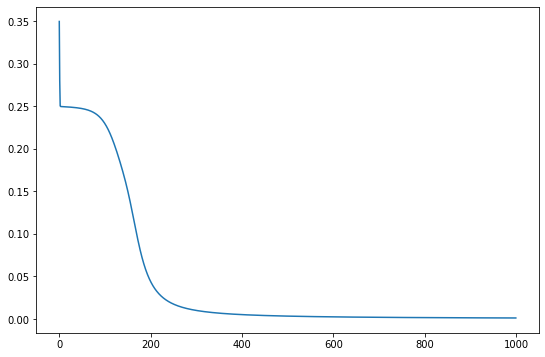

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9, 6))
plt.plot(Loss_Record)
plt.show()

# 
# 
# 
# The End
# 
# 
# 